In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install pandas --timeout 300

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.dropna(how='all', inplace=True)

In [5]:
sns.set_theme(style="whitegrid")

In [6]:
print(df.columns.tolist())

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


C:\Users\Admin\AppData\Local\Temp\ipykernel_3240\270133435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='Region', y='Sales', estimator=sum, palette='Set2')


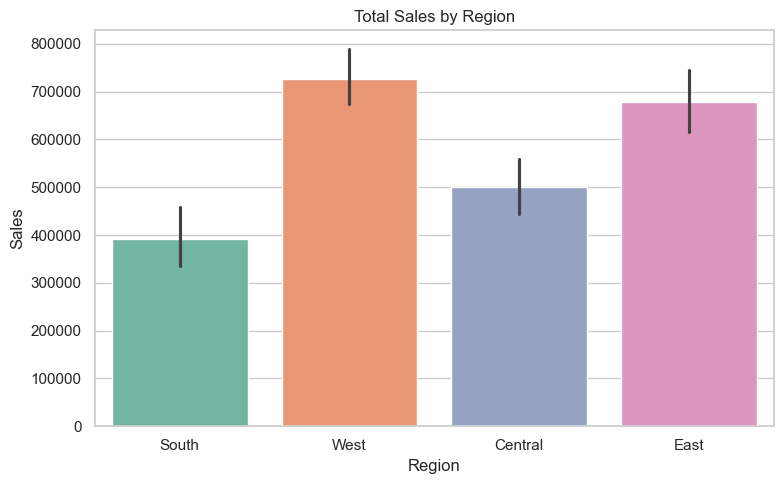

In [7]:
plt.figure(figsize=(8, 5))
df_clean = df.dropna(subset=['Region', 'Sales'])  # should work now
sns.barplot(data=df_clean, x='Region', y='Sales', estimator=sum, palette='Set2')
plt.title('Total Sales by Region')
plt.tight_layout()
plt.show()

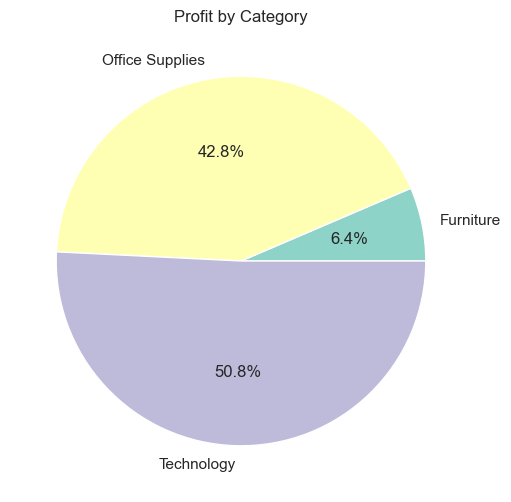

In [8]:
plt.figure(figsize=(6, 6))
df.groupby('Category')['Profit'].sum().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Profit by Category')
plt.ylabel('')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3240\3738806550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_sub.values, y=profit_by_sub.index, palette='coolwarm')


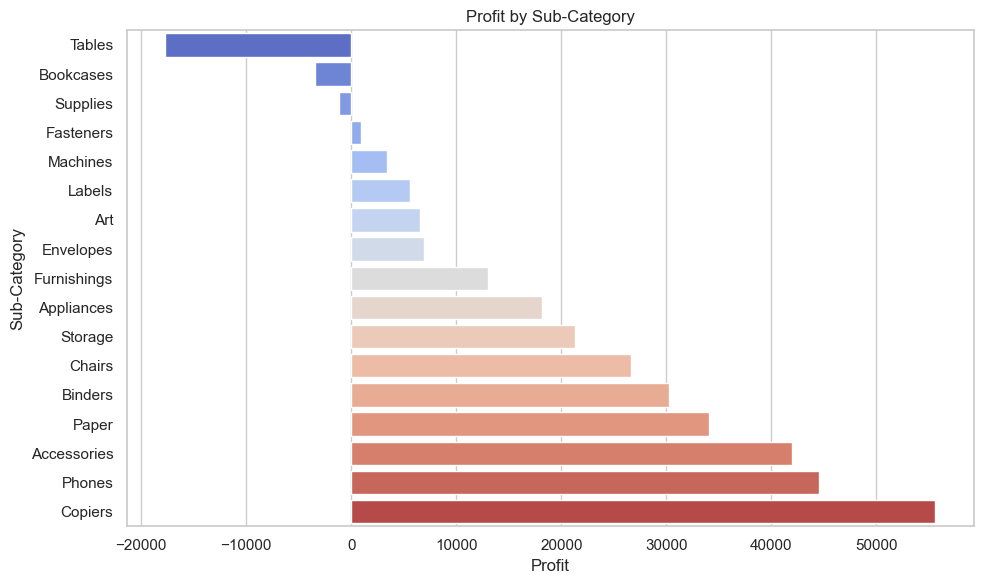

In [9]:
plt.figure(figsize=(10, 6))
profit_by_sub = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=profit_by_sub.values, y=profit_by_sub.index, palette='coolwarm')
plt.title('Profit by Sub-Category')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3240\4175621866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Segment', y='Quantity', estimator=sum, palette='pastel')


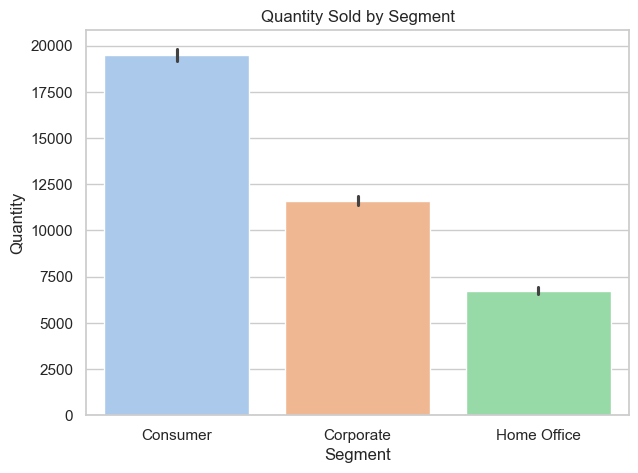

In [10]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Segment', y='Quantity', estimator=sum, palette='pastel')
plt.title('Quantity Sold by Segment')
plt.show()

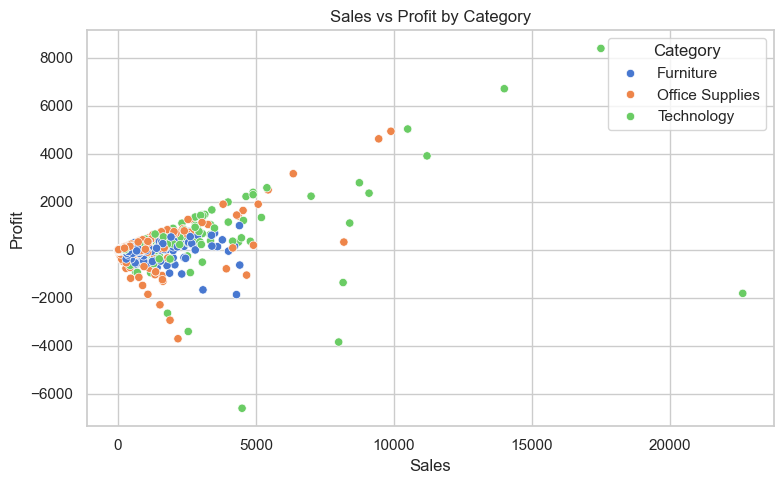

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', palette='muted')
plt.title('Sales vs Profit by Category')
plt.tight_layout()
plt.show()

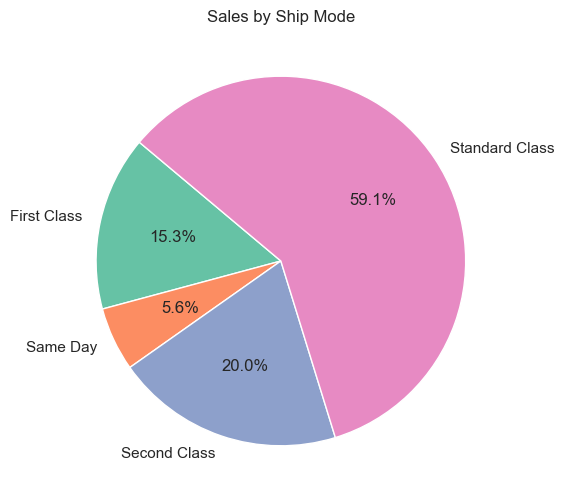

In [12]:
plt.figure(figsize=(6, 6))
df.groupby('Ship Mode')['Sales'].sum().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Sales by Ship Mode')
plt.ylabel('')
plt.show()